In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp2d
from scipy.stats import multivariate_normal

plt.rcParams['figure.figsize'] = (10, 10)

# Original distribution

In [2]:
d0 = multivariate_normal(mean=[5], cov=3)
d1 = multivariate_normal(mean=[11], cov=3)

In [3]:
def comb(pos):
    return (d0.pdf(pos) + d1.pdf(pos))/2

In [4]:
knots_x = np.linspace(-1, 20, 22)
centers_x = (knots_x[:-1]+knots_x[1:])/2
dx = np.diff(centers_x)[0]
values = comb(knots_x)

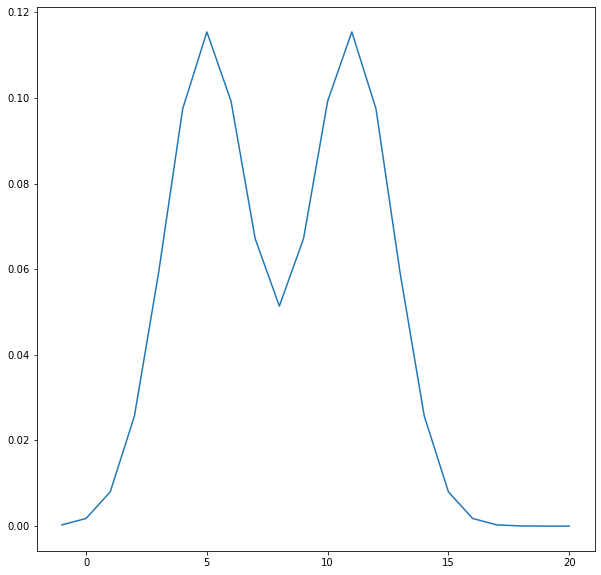

In [5]:
plt.figure()
plt.plot(knots_x, values)

In [6]:
np.trapz(values, knots_x)

0.9998216301516393

In [7]:
values

array([2.85464796e-04, 1.78549711e-03, 8.00204861e-03, 2.56968795e-02,
       5.91302213e-02, 9.75175304e-02, 1.15450181e-01, 9.92703248e-02,
       6.71295789e-02, 5.13934433e-02, 6.71295789e-02, 9.92703248e-02,
       1.15450181e-01, 9.75175304e-02, 5.91302213e-02, 2.56968795e-02,
       8.00204861e-03, 1.78549711e-03, 2.85464796e-04, 3.27025166e-05,
       2.68438603e-06, 1.57886115e-07])

In [8]:
knots_x

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14., 15., 16., 17., 18., 19., 20.])

# Compare 1D

In [9]:
test1_str = open('/tmp/test1.txt').read()
test1_str = test1_str[test1_str.index('>')+1:]
test1 = np.fromstring(test1_str, sep=',')

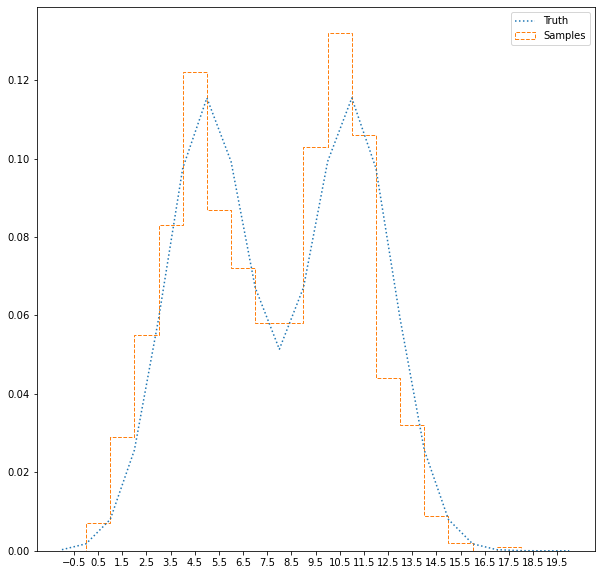

In [10]:
plt.figure()
plt.plot(knots_x, values, linestyle=':', label='Truth')
h = plt.hist(test1, bins=knots_x, density=True, histtype='step', linestyle='--', label='Samples')
plt.xticks(centers_x)
plt.legend()
plt.show()